In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit

In [2]:
def twi_minus_loglikelihood(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata091 = pd.read_csv("perlist091.csv")
    f = perdata091['f']
    per = perdata091['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata091)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
bnds=(0.001,0.1),(1.0E-5,1.0E-3),(1.5,5.0),(0,2)
minimizer_kwargs = {"bounds":(bnds)}
x0=[0.005,1.7E-4,3.8,0.8]
x0_array=np.array(x0)
m = minimize(twi_minus_loglikelihood,x0_array,method = 'L-BFGS-B', bounds=bnds)

# m = basinhopping(twi_minus_loglikelihood,x0_array,minimizer_kwargs=minimizer_kwargs)

4223.4452608304
4223.444996981547
4223.4357686042595
4223.445261343074
4223.445232271292
5388.6162430046925
5388.616366751528
5388.620096978149
5388.6162334243145
5388.616244713019
3728.168770768006
3728.1688199728123
3728.1732224462075
3728.1687706182515
3728.1687659751165
3490.0591125438964
3490.0591074114463
3490.050202623373
3490.059113098424
3490.0591069307147
3648.410176647902
3648.4102116811373
3648.4159286602594
3648.410176391191
3648.410171864203
3497.1230159942306
3497.1230233640435
3497.128669758673
3497.1230159163188
3497.1230106932658
3490.0591125438964
3490.0591074114463
3490.050202623373
3490.059113098424
3490.0591069307147
3636.0609695363387
3636.061003705217
3636.0673054265612
3636.060969163079
3636.060965369923
3495.6948350605094
3495.6948428190667
3495.700787007104
3495.6948349618046
3495.694829860717
3486.1547891016153
3486.154789387004
3486.1545090454483
3486.154789330657
3486.1547836604655
3454.033582060195
3454.0335825983107
3454.0339425901516
3454.0335822352868


In [4]:
print (m)

# L-BFGS-B  3382.861062504138
# TNC       3383.9870159092543
# SLSQP     3386.486771335871

      fun: 3382.861062504138
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -25.88740244, 7021.8804467 ,  -18.77542672,  -33.62097232])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 105
      nit: 11
   status: 0
  success: True
        x: array([7.33780009e-02, 1.07552880e-05, 2.14431610e+00, 1.66383631e+00])


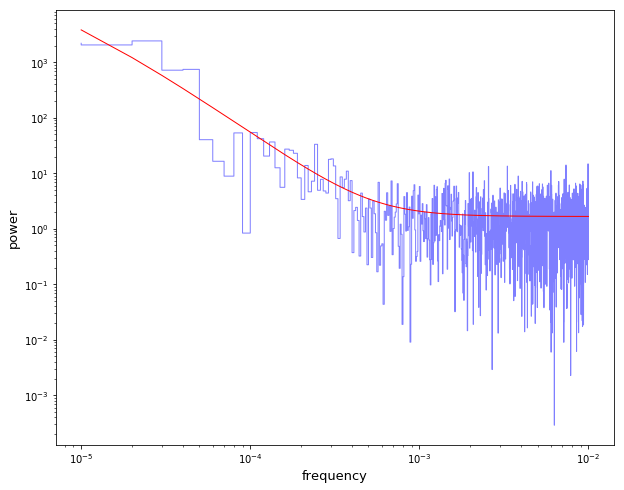

In [5]:
perdata091 = pd.read_csv("perlist091.csv")
f = perdata091['f']
per = perdata091['per']

alpha_L = 1.0
parameter = m.x
A,f_b,alpha_H,poisson = parameter

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [6]:
def twi_minus_loglikelihood_nobreak(parameter):
    A,alpha,poisson = parameter
    alpha_L = 1.0
    
    perdata091 = pd.read_csv("perlist091.csv")
    f = perdata091['f']
    per = perdata091['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*A+poisson)
     
    
    length = len(perdata091)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [7]:
bnds=(0.0000001,0.1),(1.0,5.0),(0,2)
minimizer_kwargs = {"bounds":(bnds)}
x1=[1.0E-5,2.0,1.0]
x1_array=np.array(x1)
n = minimize(twi_minus_loglikelihood_nobreak,x1_array,method = 'L-BFGS-B', bounds=bnds)

3878.6469091285862
3878.894949481129
3878.646928773937
3878.646905611762
11748.930681894251
11746.754528555768
11748.930679496038
11748.930640190274
3773.3878238158018
3773.600386128835
3773.3878403632953
3773.387820088871
5658.415651737677
5513.752646725734
5658.415491148926
5658.415639567904
3555.1412693960006
3555.27107365712
3555.141276411052
3555.141264678494
5390.559597062523
5260.453440918902
5390.559452999393
5390.5595854107005
3497.919589888039
3497.9332849540974
3497.9195909014393
3497.9195847469314
3463.4279998490597
3463.371184020691
3463.427997544069
3463.427995821127
3445.4181129372855
3445.345917160359
3445.4181059556036
3445.41811059664
3434.8568818627687
3434.876719126898
3434.856885110661
3434.85688041688
3422.616278429493
3422.6159030730378
3422.6162775935354
3422.616277282365
3422.459193079473
3422.456941888806
3422.459191770691
3422.459191990495
3422.3917744496493
3422.3897775352675
3422.3917731762576
3422.3917733873463
3422.18676235449
3422.186248811796
3422.18676

In [8]:
print (n)

# L-BFGS-B  3422.1714304329125
# TNC       3654.471250218961

      fun: 3422.1714304329125
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 19.79269655, -89.42583918, -89.42861314])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 14
   status: 0
  success: True
        x: array([3.03478388e-05, 1.53466353e+00, 1.46533653e+00])


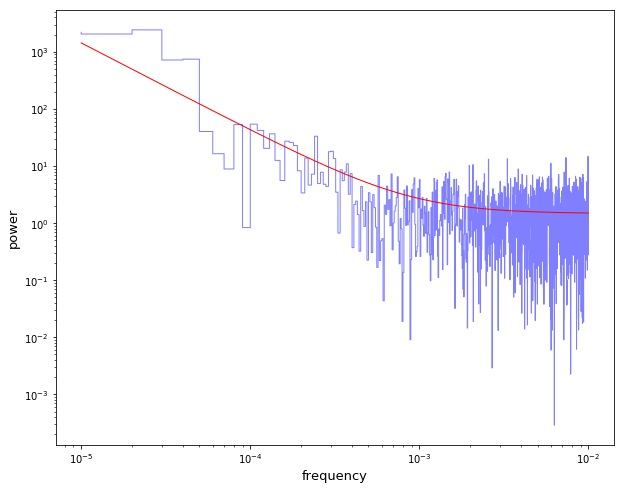

In [9]:
parameter2 = n.x
A,alpha,poisson = parameter2

model2 = []
f_length = len(f)
for i in range(f_length):
    model2.append((f[i]**(-alpha))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model2, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()